In [2]:
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt
import math

In [3]:
image = Image.open('lane.jpg') 


In [4]:
image.show()

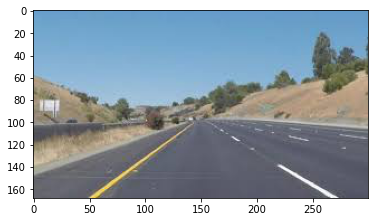

In [5]:
plt.imshow(image)

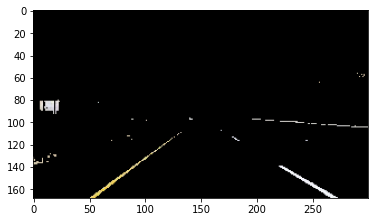

In [6]:
def select_rgb_white_yellow(image): 
      # white color mask
    lower = np.uint8([200,200,200])
    upper = np.uint8([255,255,255])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([190,190,0])
    upper = np.uint8([255,255,255])
    yellow_mask = cv2.inRange(image, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked
img = mpimg.imread('lane.jpg')     
gray = select_rgb_white_yellow(img) 
plt.imshow(gray)
plt.show()

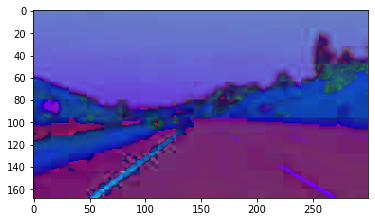

In [7]:
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
img = mpimg.imread('lane.jpg')     
gray = convert_hsv(img) 
plt.imshow(gray)
plt.show()

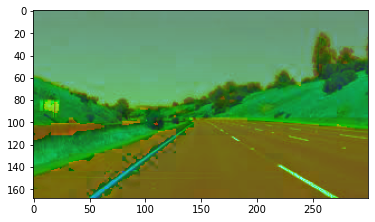

In [8]:
def convert_hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
img = mpimg.imread('lane.jpg')     
gray = convert_hls(img) 
plt.imshow(gray)
plt.show()

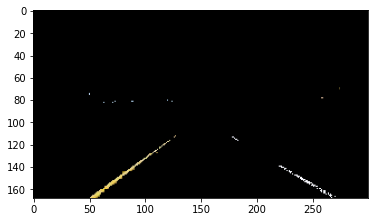

In [9]:
def select_white_yellow(image):
    converted = convert_hls(image)
    # white color mask
    lower = np.uint8([100, 200,   100])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, lower, upper)
    # yellow color mask
    lower = np.uint8([ 10,   0, 100])
    upper = np.uint8([ 30, 255, 255])
    yellow_mask = cv2.inRange(converted, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask) 
    return cv2.bitwise_and(image, image, mask = mask)
img = mpimg.imread('lane.jpg')     
gray = select_white_yellow(img) 
plt.imshow(gray)
plt.show()

In [10]:
plt.imsave('C:\\Users\\vkvku\\Desktop\\Python\\converted lane.jpg', gray)

In [11]:
image = Image.open('converted lane.jpg') 

In [12]:
image.show()

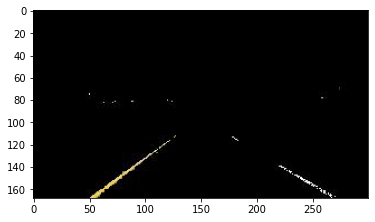

In [13]:
plt.imshow(image)

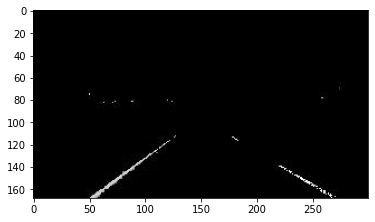

In [14]:
def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img = mpimg.imread('converted lane.jpg')     
gray = convert_gray_scale(img) 
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

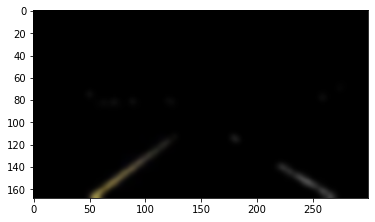

In [15]:
def apply_smoothing(image, kernel_size=15):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
img = mpimg.imread('converted lane.jpg')     
gray = apply_smoothing(img) 
plt.imshow(gray)
plt.show()

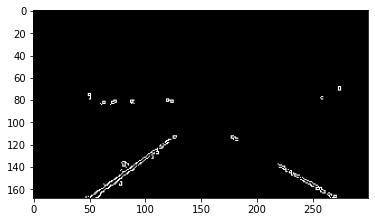

In [16]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)
img = mpimg.imread('converted lane.jpg')     
gray = detect_edges(img) 
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
cv2.imwrite('C:\\Users\\vkvku\\Desktop\\Python\\con lane.jpg', gray)

True

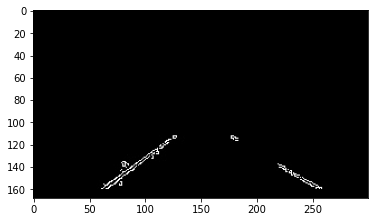

In [18]:
def filter_region(image, vertices):
    """
    Create the mask using the vertices and apply it to the input image
    """
    mask = np.zeros_like(image)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2]) # in case, the input image has a channel dimension        
    return cv2.bitwise_and(image, mask)

    
def select_region(image):
    """
    It keeps the region surrounded by the `vertices` (i.e. polygon).  Other area is set to 0 (black).
    """
    # first, define the polygon by vertices
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.1, rows*0.95]
    top_left     = [cols*0.4, rows*0.6]
    bottom_right = [cols*0.9, rows*0.95]
    top_right    = [cols*0.6, rows*0.6] 
    # the vertices are an array of polygons (i.e array of arrays) and the data type must be integer
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return filter_region(image, vertices)
img = mpimg.imread('con lane.jpg')
gray = select_region(img) 
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
cv2.imwrite('C:\\Users\\vkvku\\Desktop\\Python\\canny lane.jpg', gray)

True

(168, 300)
(168, 300, 3)


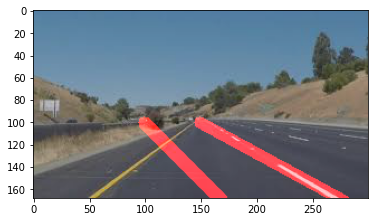

In [20]:
def draw_lines(img, lines, color= [255, 0, 0], thickness= 10):
    
    left_x = []  # list to store values of x coordinate corresponding to left lane
    left_y = []  # list to store values of y coordinate corresponding to left lane
    right_x = []  # list to store values of x coordinate corresponding to right lane
    right_y = []  # list to store values of y coordinate corresponding to right lane
    
    # seperating the points belonging to left and right lane
    for line in lines:
        for x1,y1,x2,y2 in line:
            if(x1 < img.shape[0]/2):
                left_x.append(x1)
                left_x.append(x2)
                left_y.append(y1)
                left_y.append(y2)
            else:
                right_x.append(x1)
                right_x.append(x2)
                right_y.append(y1)
                right_y.append(y2)
            
    # join all the points in left lane and form a single line
    np_left_x = np.array(left_x)
    np_left_y = np.array(left_y)
    left_lane = np.polyfit(np_left_x,np_left_y,1)
    y1 = 170
    x1 = int((y1 - left_lane[0] / left_lane[0]))
    y2 = 100
    x2 = int((y2 - left_lane[1] / left_lane[1])) 
    cv2.line(img, (x2, y2), (x1, y1), color, thickness)
    
    # join all the points in right lane and form a single line
    np_right_x = np.array(right_x)
    np_right_y = np.array(right_y)
    right_lane = np.polyfit(np_right_x,np_right_y,1)
    y1 = 170
    x1 = int((y1 - right_lane[1]) / right_lane[0])
    y2 = 100
    x2 = int((y2 - right_lane[1]) / right_lane[0])
    cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img):

    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):

    return cv2.addWeighted(initial_img, α, img, β, γ)
img = mpimg.imread('canny lane.jpg')
line_img = hough_lines(img)
print(img.shape)
print(line_img.shape)
initial_img = mpimg.imread('lane.jpg')
gray = weighted_img(line_img, initial_img)
plt.imshow(gray)
plt.show()
